In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [12]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)


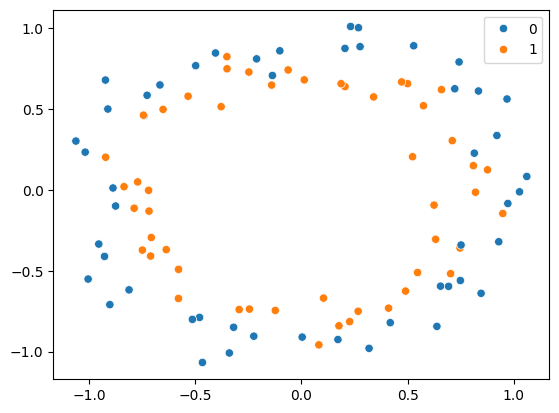

In [13]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);
#

In [14]:
X_train, X_test ,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.4664 - loss: 0.6998 - val_accuracy: 0.7500 - val_loss: 0.6771
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3875 - loss: 0.7023 - val_accuracy: 0.7000 - val_loss: 0.6842
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4297 - loss: 0.6955 - val_accuracy: 0.4500 - val_loss: 0.6894
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4563 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6952
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5102 - loss: 0.6910 - val_accuracy: 0.4500 - val_loss: 0.7012
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4906 - loss: 0.6900 - val_accuracy: 0.4500 - val_loss: 0.7073
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5414 - loss: 0.6820 - val_accuracy: 0.4000 - val_loss: 0.7134
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5125 - loss: 0.6876 - val_accuracy: 0.3000 - 

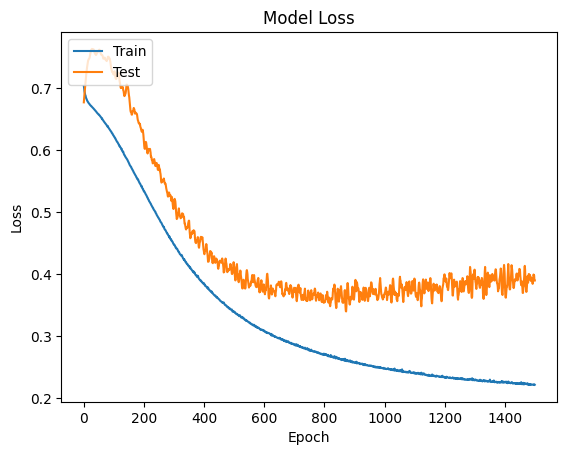

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


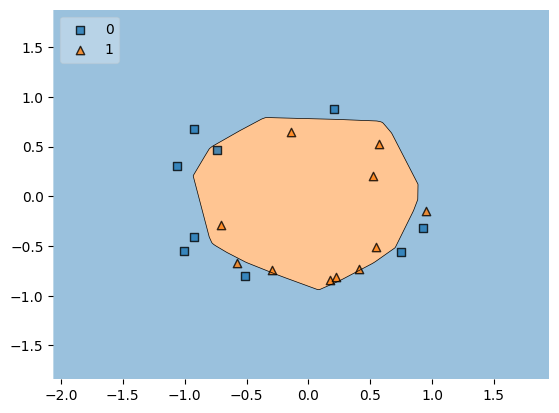

In [22]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

# Early Stopping


In [60]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
callbacks = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=100,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)



In [66]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, callbacks=[callbacks])

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6148 - loss: 0.6546 - val_accuracy: 0.3500 - val_loss: 0.7510
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6305 - loss: 0.6435 - val_accuracy: 0.3500 - val_loss: 0.7519
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6148 - loss: 0.6548 - val_accuracy: 0.3500 - val_loss: 0.7516
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6898 - loss: 0.6371 - val_accuracy: 0.3500 - val_loss: 0.7516
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6430 - loss: 0.6440 - val_accuracy: 0.3500 - val_loss: 0.7500
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6430 - loss: 0.6493 - val_accuracy: 0.4000 - val_loss: 0.7484
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6195 - loss: 0.6519 - val_accuracy: 0.4000 - val_loss: 0.7465
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6156 - loss: 0.6549 - val_accuracy: 0.4000 - v

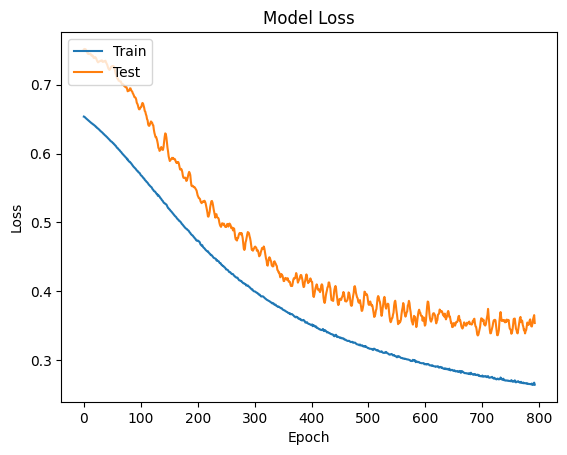

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')